In [7]:
from main_settings import analysis_begin, analysis_end, weights, pars, res, assets, mods

if abs(sum(weights.values()) - 1) > 0.000001:
    raise Exception('Sum of weights is not 1', sum(weights.values()))

In [8]:
from imposing_functions import Enginehouse
e = Enginehouse(**pars)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Trend analysis

- Regression function computes an Ordinary Least Squares model for every word frequency for the whole period and a limited number of periods (by default 12, 6 and 3 months) 
- The coefficients are normalized by mean frequency by month (coef_norm) and peak frequency: maximum frequency by month (coef_norm_max). It also saves the results to a .csv file
- Results are saved in: '../out/res/'
- In the coefs_weighted_site.csv file you will find regression coefficients for the whole period, similarly files which names end with "3", "6", "12" cover shorter periods

In [8]:
e.reg()


0 12093 0:00:00.000031
1000 12093 0:00:00.972676
2000 12093 0:00:01.318880
3000 12093 0:00:01.102559
4000 12093 0:00:00.939247
5000 12093 0:00:00.951524
6000 12093 0:00:00.962318
7000 12093 0:00:01.132176
8000 12093 0:00:01.047475
9000 12093 0:00:00.966794
10000 12093 0:00:00.977048
11000 12093 0:00:01.006050
12000 12093 0:00:01.084839
12
0 12093 0:00:00.000049
1000 12093 0:00:01.056570
2000 12093 0:00:00.998491
3000 12093 0:00:01.098308
4000 12093 0:00:01.168325
5000 12093 0:00:01.343967
6000 12093 0:00:01.114611
7000 12093 0:00:01.046821
8000 12093 0:00:01.175538
9000 12093 0:00:01.233305
10000 12093 0:00:01.083352
11000 12093 0:00:00.978124
12000 12093 0:00:00.929805
6
0 12093 0:00:00.000047
1000 12093 0:00:01.024176
2000 12093 0:00:01.101456
3000 12093 0:00:01.264295
4000 12093 0:00:01.199310
5000 12093 0:00:01.002179
6000 12093 0:00:00.910462
7000 12093 0:00:00.903633
8000 12093 0:00:00.887467
9000 12093 0:00:00.952850
10000 12093 0:00:01.251161
11000 12093 0:00:01.082857
12000 1

In [10]:
coef=pd.read_csv(res + 'coefs_weighted_site.csv')

In [11]:
coef.columns

Index(['Unnamed: 0', 'freq_2020-01', 'freq_2019-12', 'freq_2019-11',
       'freq_2019-10', 'freq_2019-09', 'freq_2019-08', 'freq_2019-07',
       'freq_2019-06', 'freq_2019-05', 'freq_2019-04', 'freq_2019-03',
       'freq_2019-02', 'freq_2019-01', 'freq_2018-12', 'freq_2018-11',
       'freq_2018-10', 'freq_2018-09', 'freq_2018-08', 'freq_2018-07',
       'freq_2018-06', 'freq_2018-05', 'freq_2018-04', 'freq_2018-03',
       'freq_2018-02', 'freq_2018-01', 'freq_2017-12', 'freq_2017-11',
       'freq_2017-10', 'freq_2017-09', 'freq_2017-08', 'freq_2017-07',
       'freq_2017-06', 'freq_2017-05', 'freq_2017-04', 'freq_2017-03',
       'freq_2017-02', 'freq_2017-01', 'freq_2016-12', 'freq_2016-11',
       'freq_2016-10', 'freq_2016-09', 'freq_2016-08', 'freq_2016-07',
       'freq_2016-06', 'freq_2016-05', 'freq_2016-04', 'freq_2016-03',
       'freq_2016-02', 'freq_2016-01', 'coef_norm', 'coef_norm_max', 'coef'],
      dtype='object')

## Let's sort our results by decreasing regression coefficient

In [12]:
# We found that coefficient >0.025 filters non-significant, non-tech words well. But you can experiment with different values
coefs=coef[coef['coef_norm']>0.025].sort_values('coef',ascending=False)

- the most trending words include Huawei, Musk and 2018

In [13]:
coefs

Unnamed: 0  freq_2020-01  freq_2019-12  freq_2019-11  freq_2019-10  \
7        huawei      2.445652      1.050000      0.109756      0.056604   
20         musk      0.130435      2.200000      0.378049      0.160377   
23         2018      0.315217      0.433333      0.195122      0.188679   
25         2019      0.347826      0.533333      0.353659      0.301887   
27           5g      0.576087      0.166667      0.085366      0.018868   
...         ...           ...           ...           ...           ...   
8089     **no**      0.010870      0.000000      0.000000      0.000000   
8090  supercool      0.010870      0.000000      0.000000      0.000000   
8097    one-pag      0.010870      0.000000      0.000000      0.000000   
8137       31.1      0.010870      0.000000      0.000000      0.000000   
8138        erm      0.010870      0.000000      0.000000      0.000000   

      freq_2019-09  freq_2019-08  freq_2019-07  freq_2019-06  freq_2019-05  \
7         0.324675      0.385542      0.758242      0.595506      1.887640   
20        0.000000      0.000000      0.109890      0.000000      0.123596   
23        0.246753      0.409639      0.274725      0.101124      0.191011   
25        0.480519      0.493976      0.285714      0.202247      0.247191   
27        0.181818      0.433735      0.945055      0.393258      0.662921   
...            ...           ...           ...           ...           ...   
8089      0.000000      0.000000      0.000000      0.000000      0.000000   
8090      0.000000      0.000000      0.000000      0.000000      0.000000   
8097      0.000000      0.000000      0.000000      0.000000      0.000000   
8137      0.000000      0.000000      0.000000      0.000000      0.000000   
8138      0.000000      0.000000      0.000000      0.000000      0.000000   

      ...  freq_2016-07  freq_2016-06  freq_2016-05  freq_2016-04  \
7     ...      0.021583      0.097701      0.017442      0.123153   
20    ...      0.323741      0.189655      0.087209      0.044335   
23    ...      0.000000      0.011494      0.011628      0.014778   
25    ...      0.000000      0.005747      0.005814      0.004926   
27    ...      0.000000      0.005747      0.000000      0.000000   
...   ...           ...           ...           ...           ...   
8089  ...      0.000000      0.000000      0.005814      0.000000   
8090  ...      0.000000      0.000000      0.005814      0.000000   
8097  ...      0.000000      0.000000      0.000000      0.000000   
8137  ...      0.007194      0.000000      0.000000      0.000000   
8138  ...      0.007194      0.000000      0.000000      0.000000   

      freq_2016-03  freq_2016-02  freq_2016-01  coef_norm  coef_norm_max  \
7         0.009174      0.084388      0.025532   0.064834       0.009286   
20        0.018349      0.088608      0.025532   0.035333       0.004344   
23        0.027523      0.000000      0.008511   0.051372       0.015635   
25        0.009174      0.012658      0.008511   0.079393       0.016471   
27        0.000000      0.000000      0.008511   0.080937       0.008430   
...            ...           ...           ...        ...            ...   
8089      0.000000      0.000000      0.000000   0.043333       0.001357   
8090      0.000000      0.000000      0.000000   0.043333       0.001357   
8097      0.000000      0.000000      0.000000   0.028000       0.000994   
8137      0.000000      0.000000      0.000000   0.036364       0.001233   
8138      0.000000      0.000000      0.000000   0.036364       0.001233   

          coef  
7     0.022711  
20    0.009557  
23    0.008958  
25    0.008785  
27    0.007967  
...        ...  
8089  0.000015  
8090  0.000015  
8097  0.000015  
8137  0.000013  
8138  0.000013  

[4134 rows x 53 columns]

- Regression function computes an Ordinary Least Squares model for every word frequency for the whole period and a limited number of periods (by default 12, 6 and 3 months) 
- The coefficients are normalized by mean frequency by month (coef_norm) and peak frequency: maximum frequency by month (coef_norm_max). It also saves the results to a .csv file
- Results are saved in: '../out/res/'
- In the coefs_weighted_site.csv file you will find regression coefficients for the whole period, similarly files which names end with "3", "6", "12" cover shorter periods

In [14]:
# choose keywords for trend analysis
selected_coefs=['huawei','5g','cambridg_analytica','tiktok']

In [15]:
# limit our df to the rows pertaining to our selected keywords and do some cleaning
sel=coefs.loc[coef['Unnamed: 0'].isin(selected_coefs)]
col=['coef','coef_norm_max','coef_norm']
sel.drop(col, axis=1,inplace=True)
sel.rename(columns={'Unnamed: 0':'keyword'},inplace=True)
sel.columns=[col.strip('freq_') for col in sel.columns]

/Users/kristof/anaconda3/envs/myPython/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/kristof/anaconda3/envs/myPython/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
# prepare data in format suitable for seaborn visualization
selT=sel.transpose()
selT.columns=selT.iloc[0]
selT=selT.iloc[1:]
selT=selT.iloc[::-1]
selT.index=pd.to_datetime(selT.index)

In [16]:
# let's smooth our data by showing 3 months rolling mean
data = selT.rolling(3).mean()

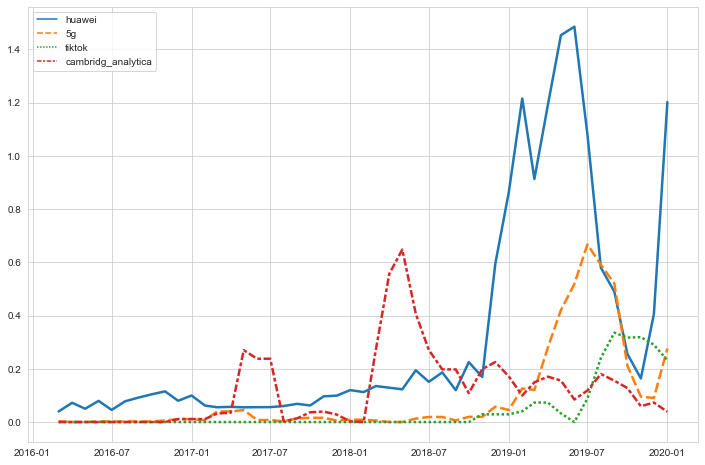

In [17]:
# visualize selected trends
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.lineplot(data=data, linewidth=2.5)

# Choose keywords for co-occurrence analysis

In [4]:
#Here you can define the list of words for the co-occurrence and sentiment analyses

important=['huawei','5g','facial_recognit']

In [18]:
e.cooc(important)

guardian 0:00:00.000007
0 2016-01
1 2016-02
2 2016-03
3 2016-04
4 2016-05
5 2016-06
6 2016-07
7 2016-08
8 2016-09
9 2016-10
10 2016-11
11 2016-12
12 2017-01
13 2017-02
14 2017-03
15 2017-04
16 2017-05
17 2017-06
18 2017-07
19 2017-08
20 2017-09
21 2017-10
22 2017-11
23 2017-12
24 2018-01
25 2018-02
26 2018-03
27 2018-04
28 2018-05
29 2018-06
30 2018-07
31 2018-08
32 2018-09
33 2018-10
34 2018-11
35 2018-12
36 2019-01
37 2019-02
38 2019-03
39 2019-04
40 2019-05
41 2019-06
42 2019-07
43 2019-08
44 2019-09
45 2019-10
46 2019-11
47 2019-12
48 2020-01
coef huawei 0.0 0:00:00.000009
not continued
huawei huawei       100.000000
musk           0.000000
2018           3.600465
2019           3.774681
5g            17.305459
                ...    
**no**         0.000000
supercool      0.000000
one-pag        0.000000
31.1           0.000000
erm            0.000000
Name: huawei_count_guardian_freq, Length: 4134, dtype: float64
not continued
huawei huawei       100.000000
musk           0.000000

In [16]:
coocs=pd.read_csv(res + 'cooc_weighted.csv')

The columns reveal the examined word (e.g. Huawei), while the rows show the most frequently co-occurring words. The various columns mark the different methods of calculations. The two main groups are *count* and *bool*: for more details see the *0_text_transformation_guide*. Our preferred measure is *count_freq_weighted*: the number of times the term in the row appear in articles together with word in the column is divided by the number of times the word in the column is mentioned across all articles (multiplied by 100)

In [18]:
# Print co-occurring terms for a given keyword. In this case 'facial_recognit'
coocs.sort_values('huawei_count_freq_weighted',ascending=False)[:20]

Unnamed: 0  huawei_count_freq_weighted  \
0         huawei                  100.000000   
7          china                   24.912892   
10        chines                   18.292683   
6            pro                   18.002323   
4             5g                   17.305459   
34           ram                    9.349593   
53       oneplus                    7.607433   
9            ban                    7.317073   
88  selfi_camera                    6.794425   
63  nation_secur                    6.736353   
24          zoom                    6.736353   
47         equip                    6.620209   
11     australia                    6.562137   
23    5g_network                    6.155633   
8       iphon_11                    6.039489   
91        galaxi                    5.807201   
50         128gb                    5.632985   
46        canada                    5.574913   
25     oneplus_7                    5.168409   
62          meng                    5.168409   

    huawei_count_freq_weighted_normalized  \
0                              285.480727   
7                              105.504297   
10                             136.423055   
6                              121.807880   
4                              175.800349   
34                             143.683306   
53                             223.460373   
9                               32.360824   
88                             210.438704   
63                             140.627945   
24                             147.824325   
47                             117.130064   
11                              46.673983   
23                             225.037017   
8                              111.423525   
91                             174.262781   
50                             140.986253   
46                             113.842016   
25                             210.455670   
62                             261.869742   

    huawei_count_freq_weighted_normalized_root  huawei_bool_freq_weighted  \
0                                   168.961749                 100.000000   
7                                    51.268091                  40.160643   
10                                   49.955417                  48.192771   
6                                    46.827607                  24.899598   
4                                    55.157100                  30.120482   
34                                   36.652156                  28.514056   
53                                   41.230570                  14.859438   
9                                    15.387869                  24.899598   
88                                   37.812829                  24.096386   
63                                   30.778556                  24.899598   
24                                   31.556249                  16.064257   
47                                   27.846463                  23.293173   
11                                   17.500888                  18.473896   
23                                   37.218883                  23.694779   
8                                    25.941109                   2.409639   
91                                   31.811617                  15.261044   
50                                   28.181083                  17.269076   
46                                   25.192446                  14.859438   
25                                   32.980615                   6.827309   
62                                   36.789263                   7.630522   

    huawei_bool_freq_weighted_normalized  \
0                             285.480727   
7                             170.077418   
10                            359.411743   
6                             168.476441   
4                             305.983869   
34                            438.200215   
53                            436.480401   
9                             110.122106   
88                            746.319

## Sentiment analysis

Sentiment is calculated using the VADER package (Valence Aware Dictionary and SEntiment Reasoner). VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in short texts.  

All paragraphs in articles containing the given term are modified to exclude this term and assigned a score between -1 (most extreme negative) and 1 (most extreme positive) by VADER. Removal of terms is meant to exclude sentiment of the term itself, because the term may not be emotionally neutral, e.g. when some technologies or companies attempt to solve a negative issue. In such case, the neighbourhood’s scores would be positive, but the negative term would bring the paragraph’s score down.

In [3]:
e.sentiment(important)

['huawei', '5g', 'facial_recognit']
defaultdict(<function Enginehouse.comparison_cooc.<locals>.<lambda> at 0x11a2ff3a0>, {'huawei': ['huawei', 'china', 'chines', 'pro', '5g', 'ram', 'oneplus', 'ban', 'selfi_camera', 'nation_secur', 'zoom', 'equip', 'australia', '5g_network', 'iphon_11', 'galaxi', '128gb', 'canada', 'meng', 'oneplus_7', 'notch', 'suppli', 'xl', '4g', 'wireless_charg', 's10+', 'cheaper', '2019', 'vodafon', 'pie', '2018', 'android_9', 'for_comparison', 'honor', 'mate_20', '8gb', 'prime_minist', 'water_resist', 'dual-sim', 'secretari', 'other_review', 'chines_govern', '**processor', '256gb', '**screen', '**oper', '**connect', '**dimens', 'earbud', 'low-light', 'iran', 'beij', '**ram', '64gb', '**camera', '**storag', 'galaxi_s10', 'bluetooth_5', 'googl_assist', 'xiaomi', 'supplier', 'surveil', 'p30_pro', 'ee', 'max', '**rrp', 'oneplus_6t', 'broadband', 'note_9', 'meng_wanzhou', 'qualcomm_snapdragon', 'ren', 'sanction', 'swipe', 'pompeo', 'johnson', 'ultra-wid', '6gb', 'chin

In [9]:
sents=pd.read_csv(res + 'sentiments_mod.csv')

In [10]:
sents.rename(columns={'Unnamed: 0':'Date'},inplace=True)
sents.index=sents['Date']

In [19]:
data=sents.rolling(3).mean()

In [20]:
# let's smooth our data by showing 3 months rolling mean
data = sents.rolling(3).mean()

In [21]:
data=data[data.columns.drop(list(data.filter(regex='_count')))]

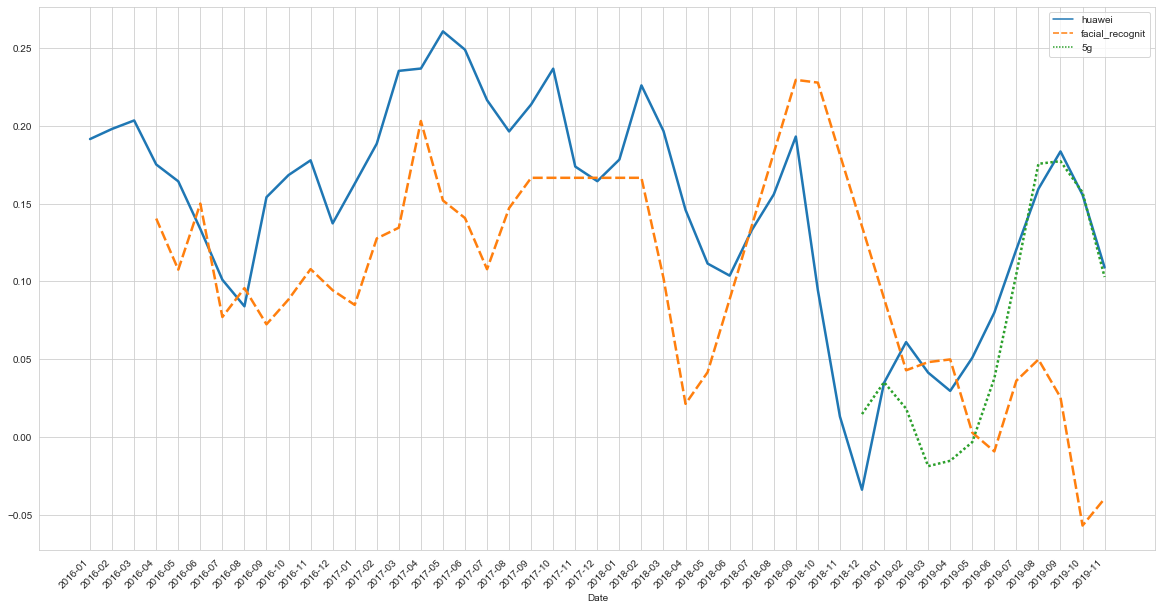

In [36]:
# visualize selected sentiments dynamics
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax=sns.lineplot(data=data, linewidth=2.5)
ax.set_xticklabels(data.index,rotation=45, ha="right");

## In the next tutorial you will learn how to apply topic modelling algorithms on our dataset. See: B1_LDA.ipynb